In [1]:
#%matplotlib inline
import numpy as np
import random as rand
import matplotlib.pyplot as plt

In [2]:
class Tree(object):
    def __init__(self):
        self.left = None
        self.right = None
        self.feature = None
        self.theta = None
        self.constant = None
        self.size = None

In [3]:
def read_data(path,dimensions):
    x=[]
    for i in range(dimensions-1):
        x.append([])
    y=[]
    with open(path) as file:
        for line in file:
            for i,value in enumerate(line.split()):
                if i!=dimensions-1:
                    x[i].append(float(value))
                else:
                    y.append(int(value))
        file.close()
    return (x,y)

In [4]:
def sign(x):
    if x>=0:
        return 1
    else:
        return -1

In [5]:
def impurity(y):
    mu=y.count(1)/len(y)
    return 2*mu*(1-mu)

In [6]:
def isTerminate(x,y):
    if all(i == y[0] for i in y):
        return True
    else:
        for i in range(len(x)):
            if not all(j == x[i][0] for j in x[i]):
                return False
        return True

In [7]:
def decisionTree_train(x,y,isTer):
    if isTerminate(x,y) or isTer:
        if all(i == y[0] for i in y):
            root = Tree()
            root.constant = y[0]
            root.size=len(y)
        else:
            root = Tree()
            if y.count(1)>y.count(-1):
                root.constant = 1
            else:
                root.constant = -1
            root.size=len(y)
        return root
    else:
        x_candidates=[]
        for i in range(len(x)):
            x_candidates.append([])
        for i in range(len(x)):
            temp=sorted(x[i])
            temp=list(set(temp))
            for j in range(1,len(temp)):
                x_candidates[i].append((temp[j-1]+temp[j])/2)
        best_impurity=len(x[0])/2
        for i in range(len(x_candidates)):
            for j in range(len(x_candidates[0])):
                y1=[]
                y2=[]
                for k in range(len(x[0])):
                    if x[i][k]<x_candidates[i][j]:
                        y1.append(y[k])
                    else:
                        y2.append(y[k])
                total_impurity=len(y1)*impurity(y1)+len(y2)*impurity(y2)
                if total_impurity<=best_impurity:
                    best_impurity=total_impurity
                    best_feature=i
                    best_candidate=j
        x1=[]
        x2=[]
        y1=[]
        y2=[]
        for i in range(len(x)):
            x1.append([])
            x2.append([])
        for k in range(len(x[0])):
            if x[best_feature][k]<x_candidates[best_feature][best_candidate]:
                for i in range(len(x)):
                    x1[i].append(x[i][k])
                y1.append(y[k])
            else:
                for i in range(len(x)):
                    x2[i].append(x[i][k])
                y2.append(y[k])
        root = Tree()
        root.left = decisionTree_train(x1,y1,True)
        root.right = decisionTree_train(x2,y2,True)
        root.feature = best_feature
        root.theta = x_candidates[best_feature][best_candidate]
        root.size=len(x[0])
        return root

In [8]:
def decisionTree_predict(root,x):
    if root.constant!=None:
        return root.constant
    if x[root.feature]<root.theta:
        return decisionTree_predict(root.left,x)
    else:
        return decisionTree_predict(root.right,x)

In [9]:
def boostrap_data(x,y,size):
    x2=[]
    y2=[]
    for i in range(len(x)):
        x2.append([])
    for k in range(size):
        num=rand.randrange(len(x[0]))
        for i in range(len(x)):
            x2[i].append(x[i][num])
        y2.append(y[num])
    return (x2,y2)

In [10]:
iterations=30000

In [11]:
Ein_record=[]
tree_record=[]

In [12]:
x, y = read_data("../hw7_train.dat",3)
for i in range(iterations):
    x2, y2 = boostrap_data(x,y,len(x[0]))
    tree=decisionTree_train(x2,y2,False)
    tree_record.append(tree)

In [13]:
x=np.array(x)
Ein_record=np.zeros(iterations)
for k in range(len(x[0])):
    temp=0
    for i in range(iterations):
        temp+=decisionTree_predict(tree_record[i],x[:,k])
        if sign(temp)!=y[k]:
            Ein_record[i]+=1

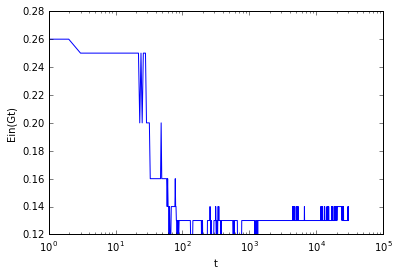

In [14]:
Ein_record/=len(x[0])
plt.semilogx(list(range(1,iterations+1)),Ein_record)
plt.xlabel("t")
plt.ylabel("Ein(Gt)")